In [79]:
import pandas_datareader.data as web
import datetime

In [80]:
start=datetime.datetime(2000,1,1)
end=datetime.datetime(2021,8,1)
df=web.DataReader('GOOGL','stooq',start,end)
df.sort_index(inplace=True,ascending=True)  #倒序排  ascending=True(缺省):2004->2021;ascending=False:2021->2004
df.dropna(inplace=True)  #删掉表中空值
print(df)

                 Open      High        Low      Close       Volume
Date                                                              
2004-08-19    2.50000    2.6015    2.39900    2.50850  894076000.0
2004-08-20    2.52525    2.7270    2.51250    2.70775  457144000.0
2004-08-23    2.76875    2.8370    2.72625    2.73500  365488000.0
2004-08-24    2.78100    2.7900    2.58925    2.62175  305252000.0
2004-08-25    2.62400    2.7000    2.59700    2.65000  183956000.0
...               ...       ...        ...        ...          ...
2021-07-26  133.32800  134.2370  132.30200  134.03500   30571480.0
2021-07-27  134.25100  134.3990  130.10400  131.90000   54709480.0
2021-07-28  136.31200  138.2970  135.27800  136.09400   95130600.0
2021-07-29  136.15000  136.6610  135.54300  135.77800   31715720.0
2021-07-30  135.03500  135.3050  134.25500  134.72700   25575780.0

[4266 rows x 5 columns]


In [81]:
#predict_day=30  #预测未来30天
predict_day=int(len(df)*0.02)  #若取2%比例做预测
df['label']=df['Close'].shift(-predict_day)  #标签设为该天30天后的收盘值
print(df)

                 Open      High        Low      Close       Volume    label
Date                                                                       
2004-08-19    2.50000    2.6015    2.39900    2.50850  894076000.0  4.62550
2004-08-20    2.52525    2.7270    2.51250    2.70775  457144000.0  4.59375
2004-08-23    2.76875    2.8370    2.72625    2.73500  365488000.0  4.65750
2004-08-24    2.78100    2.7900    2.58925    2.62175  305252000.0  4.69750
2004-08-25    2.62400    2.7000    2.59700    2.65000  183956000.0  4.79775
...               ...       ...        ...        ...          ...      ...
2021-07-26  133.32800  134.2370  132.30200  134.03500   30571480.0      NaN
2021-07-27  134.25100  134.3990  130.10400  131.90000   54709480.0      NaN
2021-07-28  136.31200  138.2970  135.27800  136.09400   95130600.0      NaN
2021-07-29  136.15000  136.6610  135.54300  135.77800   31715720.0      NaN
2021-07-30  135.03500  135.3050  134.25500  134.72700   25575780.0      NaN

[4266 rows 

In [82]:
X=df.drop(['label'],axis=1) #向量特征空间
y=df['label'][:-predict_day]
print(y)

Date
2004-08-19      4.62550
2004-08-20      4.59375
2004-08-23      4.65750
2004-08-24      4.69750
2004-08-25      4.79775
                ...    
2021-03-24    134.03500
2021-03-25    131.90000
2021-03-26    136.09400
2021-03-29    135.77800
2021-03-30    134.72700
Name: label, Length: 4181, dtype: float64


In [83]:
#标准化转化
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
scale.fit(X)#拟合
X=scale.transform(X) #转换
print(X)

[[-1.1140543  -1.11091672 -1.11611021 -1.11282649  4.88681361]
 [-1.11305331 -1.10598912 -1.11156992 -1.10493532  2.08445633]
 [-1.10340022 -1.10167011 -1.10301937 -1.10385611  1.49660087]
 ...
 [ 4.19066998  4.21699299  4.19938843  4.17773734 -0.23739441]
 [ 4.1842478   4.15275755  4.2099891   4.16522237 -0.64411937]
 [ 4.14004573  4.09951595  4.15846582  4.12359822 -0.6834992 ]]


In [84]:
X_lately=X[-predict_day:]
X=X[:-predict_day] 
print(len(X))
print(len(X_lately))

4181
85


In [85]:
#划分训练集与测试集
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20%的数据用作测试
print(len(x_train))
print(len(y_train))

3344
3344


In [86]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)  #拟合，此时线性回归模型生成
#性能上的测试
model.score(x_test,y_test)  #准确率

0.9657281116827983

In [87]:
#预测出30个数据 预测样本空间：X_lately
predict=model.predict(X_lately)
print(predict)
print(len(predict))

[115.07622311 118.73509739 129.41805307 120.73484424 122.63404682
 123.23733307 124.88687361 122.50515685 121.88765274 123.1945553
 127.13483199 123.77810518 126.08818702 126.33821484 124.72937025
 126.67954587 127.802402   126.09281358 126.03839666 138.21265332
 130.71287791 129.98711148 131.31127502 131.39374479 126.32412826
 129.33498253 128.06367408 128.4701632  126.55685113 125.28696117
 122.23811487 125.13842929 125.39523898 127.06211033 126.88861275
 125.7075732  125.73991705 132.30425771 129.3009867  128.99126449
 129.85851571 127.99069585 129.88198047 131.30732192 127.77690147
 131.53233568 129.91303701 130.56831932 129.1373171  132.95731914
 131.5061193  133.30237096 133.68005031 134.62327925 134.76115014
 132.05232508 134.45072876 132.63208238 133.08016964 131.61087511
 132.1681953  132.96888408 133.04878551 131.2075307  132.12966644
 138.93763384 138.27153031 136.98618116 136.8214789  135.76074718
 137.98581625 138.74949879 140.19816125 141.02990552 138.93751619
 139.808848

In [88]:
import numpy as np  
df['predict']=np.nan  #增加一列空值，做预测
print(df)

                 Open      High        Low      Close       Volume    label  \
Date                                                                          
2004-08-19    2.50000    2.6015    2.39900    2.50850  894076000.0  4.62550   
2004-08-20    2.52525    2.7270    2.51250    2.70775  457144000.0  4.59375   
2004-08-23    2.76875    2.8370    2.72625    2.73500  365488000.0  4.65750   
2004-08-24    2.78100    2.7900    2.58925    2.62175  305252000.0  4.69750   
2004-08-25    2.62400    2.7000    2.59700    2.65000  183956000.0  4.79775   
...               ...       ...        ...        ...          ...      ...   
2021-07-26  133.32800  134.2370  132.30200  134.03500   30571480.0      NaN   
2021-07-27  134.25100  134.3990  130.10400  131.90000   54709480.0      NaN   
2021-07-28  136.31200  138.2970  135.27800  136.09400   95130600.0      NaN   
2021-07-29  136.15000  136.6610  135.54300  135.77800   31715720.0      NaN   
2021-07-30  135.03500  135.3050  134.25500  134.7270

In [89]:
#取出最后一天时间
import datetime
print(df.index[-1])
#取出最后一天秒数
last_date_st=df.index[-1].timestamp()
next_date_st=last_date_st+86400  #一天是86400秒，下一天时间是last_date_st+86400
next_date=datetime.datetime.fromtimestamp(next_date_st)
print(next_date)

#逐一导入30个数
for i in predict:
    next_date=datetime.datetime.fromtimestamp(next_date_st)
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
    next_date_st+=86400
    
print(df.tail(40))

2021-07-30 00:00:00
2021-07-31 08:00:00
                     Open  High  Low  Close  Volume  label     predict
Date                                                                  
2021-09-14 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  131.532336
2021-09-15 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  129.913037
2021-09-16 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  130.568319
2021-09-17 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  129.137317
2021-09-18 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  132.957319
2021-09-19 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  131.506119
2021-09-20 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  133.302371
2021-09-21 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  133.680050
2021-09-22 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  134.623279
2021-09-23 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  134.761150
2021-09-24 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  132.052325
2021-09-25 08:00:00   NaN   NaN  NaN 

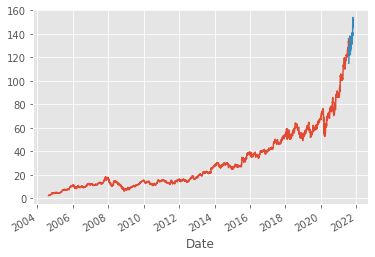

In [90]:
#画图
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
df['Close'].plot()  #收盘价曲线
df['predict'].plot()
plt.show()